## Integrated Pulmonary Fibrosis (PF) cell atlas: epithelial cell subset

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct

Running Scanpy 1.8.2, on 2022-12-30 10:02.


In [2]:
## path variables
adata_dir = '/home/niklas/data/210514_IPF_atlas_human/210611_in_vivo_reference_NIKLAS.h5ad'
project_dir = '/home/niklas/projects/niche_environments_FIBROSIS/IPF_cell_atlas_reference_CPC/01_data/marker_table/'

In [3]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/epithelia_subset/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir)

In [5]:
## have a look at the adata object: 561279 cells
adata

AnnData object with n_obs × n_vars = 559936 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    

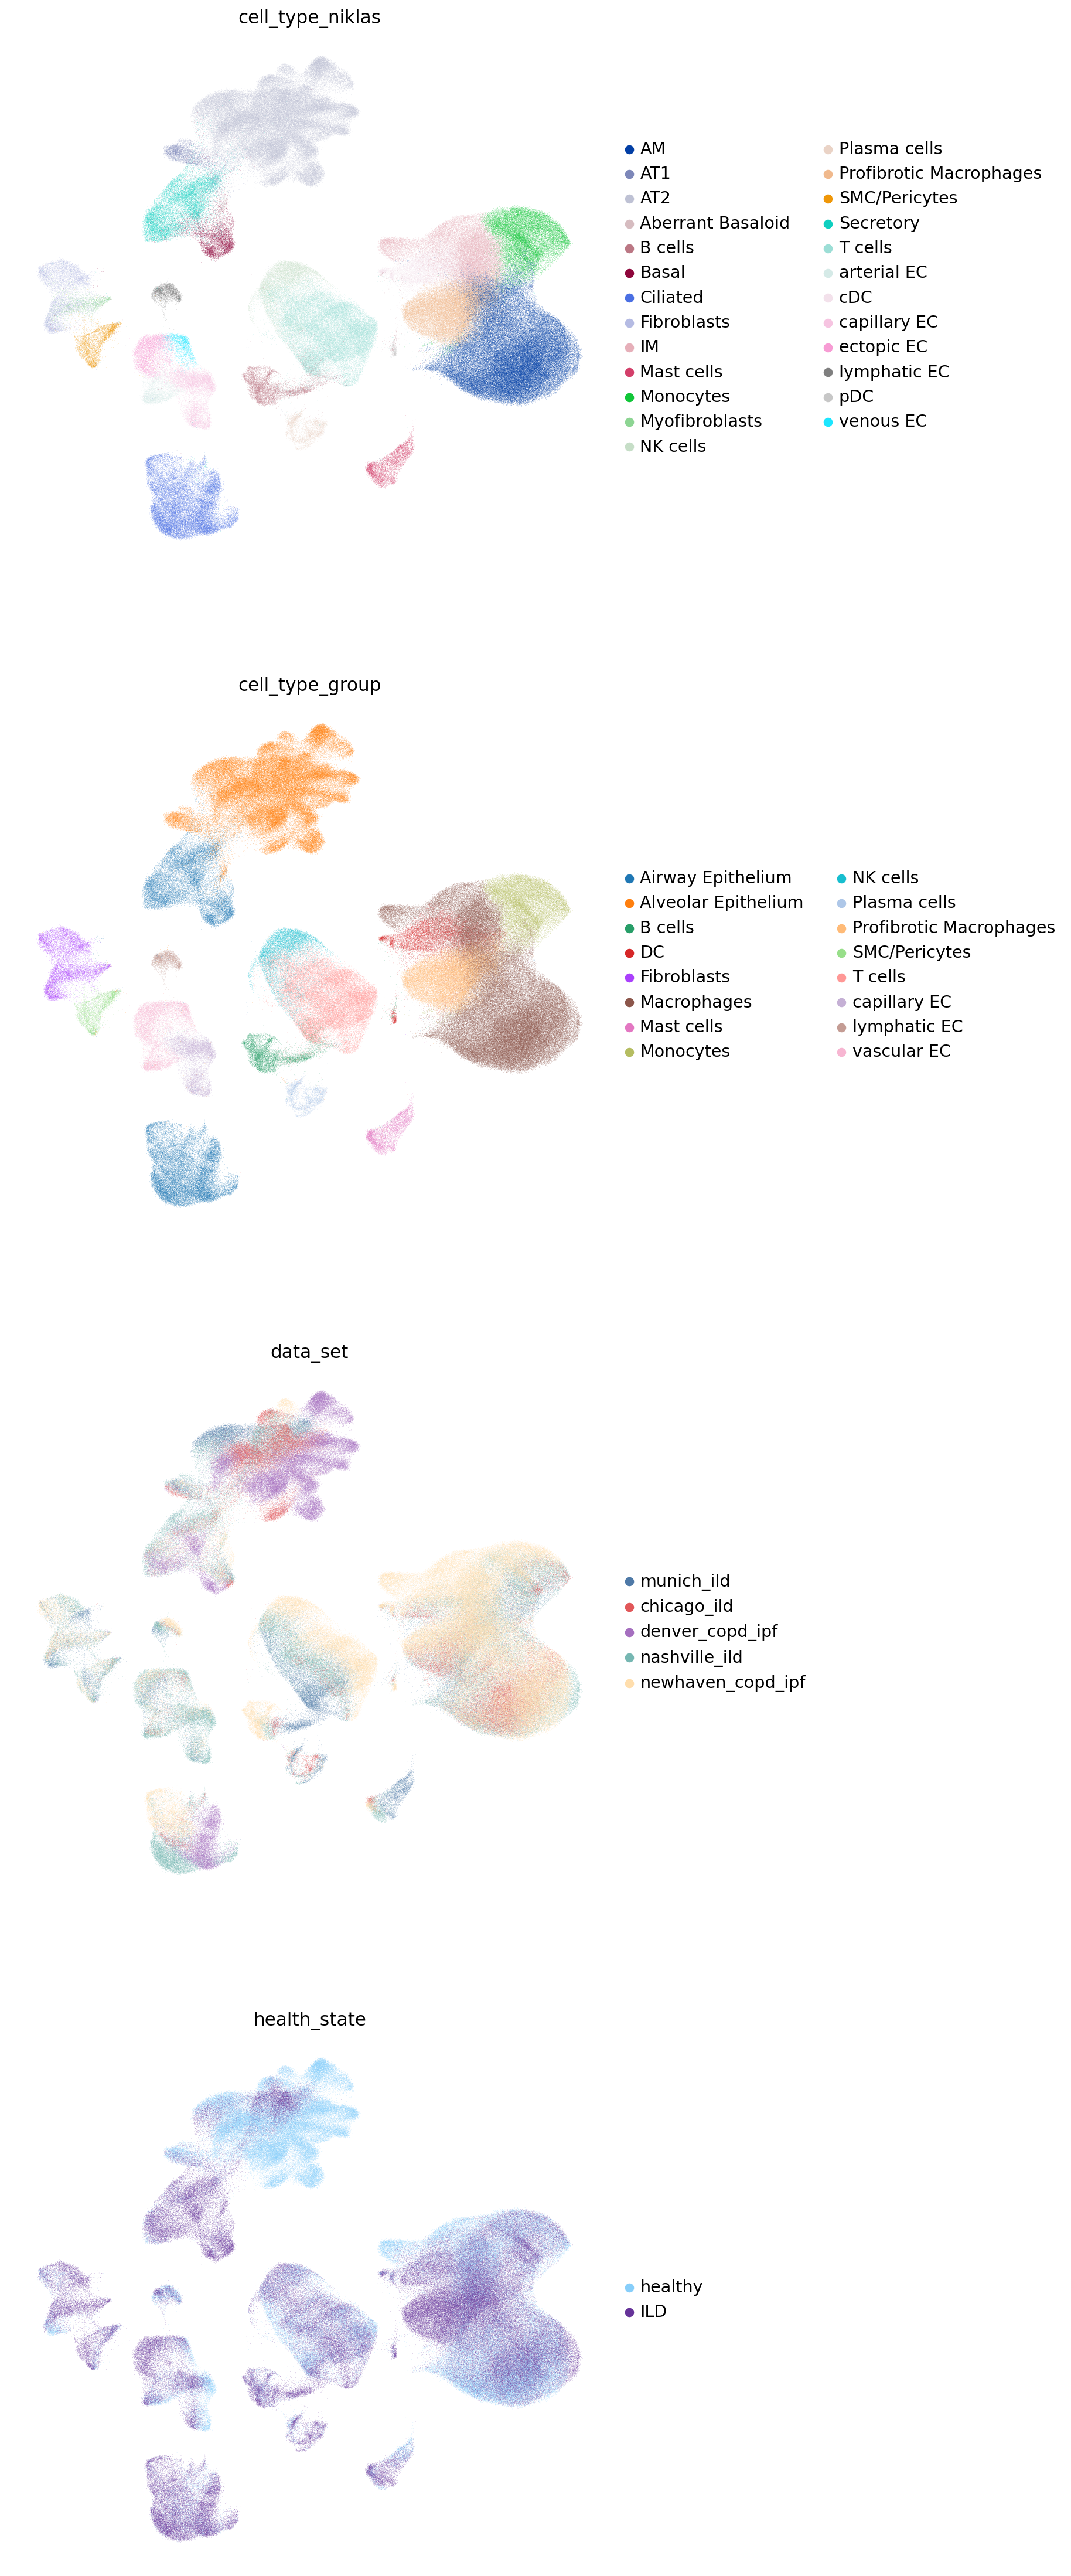

In [6]:
## overview UMAPs
sc.pl.umap(adata, color = ['cell_type_niklas',
                           'cell_type_group',
                           'data_set',
                           'health_state'], ncols = 1, frameon = False)

In [7]:
adata = adata[adata.obs.cell_type_niklas.isin(['AT1','AT2','Aberrant Basaloid','Basal','Ciliated','Secretory'])]

Trying to set attribute `.obs` of view, copying.


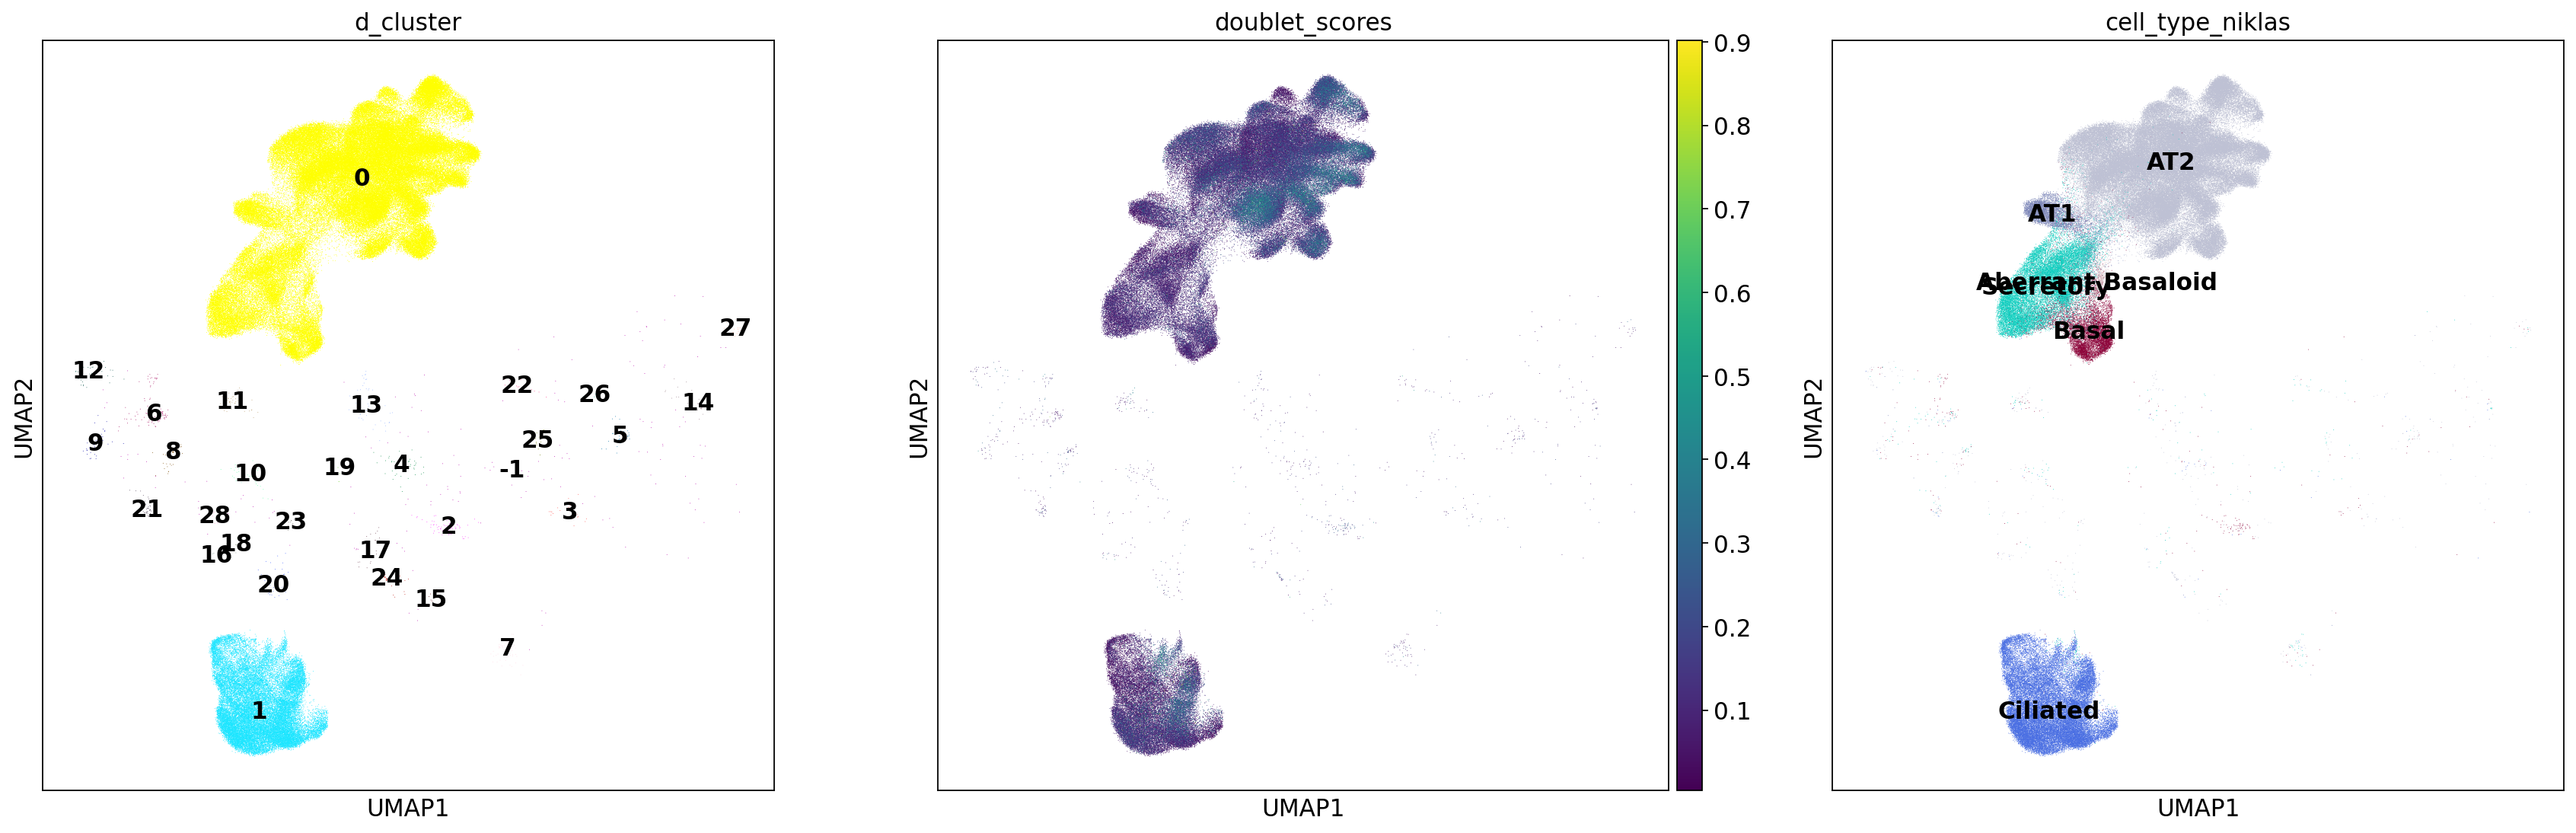

In [8]:
## using Herbert's old code snippet here
from natsort import natsorted
from sklearn.cluster import DBSCAN
def cluster_by_dscan(cords, eps, min_samples):
    clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(cords)
    return clustering.labels_

adata.obs['d_cluster'] = cluster_by_dscan(adata.obsm['X_umap'], eps = 0.5, min_samples = 5)
c = adata.obs['d_cluster'].astype('U')
adata.obs['d_cluster'] = pd.Categorical(c, categories = natsorted(np.unique(c)))

sc.pl.umap(adata, color = ['d_cluster','doublet_scores','cell_type_niklas'], legend_loc='on data')

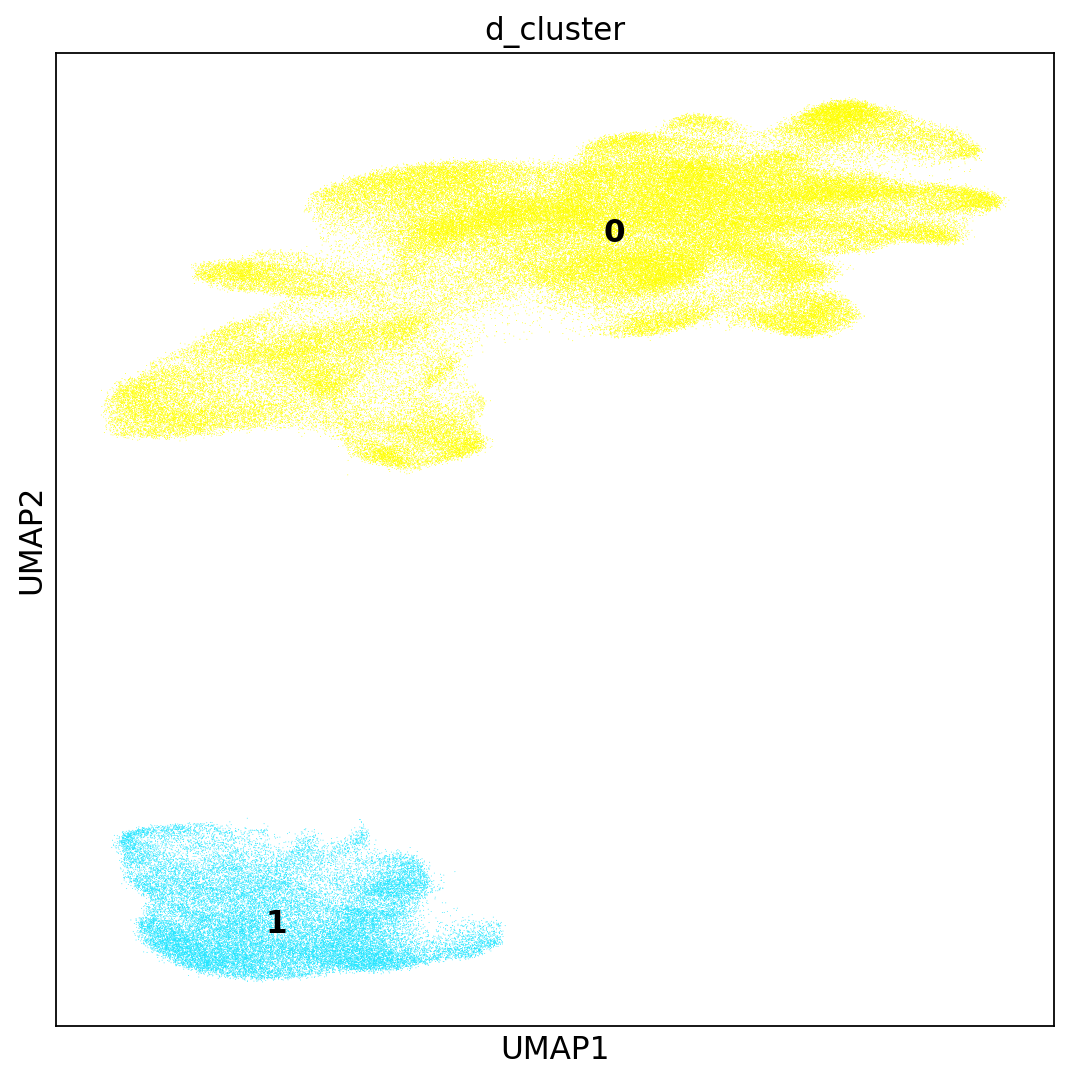

In [9]:
## discard outliers
adata = adata[adata.obs['d_cluster'].isin(['0','1'])].copy()
sc.pl.umap(adata, color = 'd_cluster', legend_loc='on data')

### Figures for Supplementary Figures

In [10]:
adata

AnnData object with n_obs × n_vars = 181453 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas', 'd_cluster'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap', 'd_cluster_colors'
    obsm: 'X_pc

In [11]:
## change order of cell type labels
adata.obs['cell_type_niklas'] = adata.obs['cell_type_niklas'].cat.reorder_categories(['AT1','AT2','Aberrant Basaloid','Basal','Ciliated','Secretory'])

In [12]:
adata.obs.cell_type.cat.categories

Index(['AT1', 'AT2', 'Basal', 'Ciliated', 'Club', 'Goblet', 'Secretory',
       'Suprabasal', 'aberrant Basaloid', 'differentiating Ciliated'],
      dtype='object')

In [13]:
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())

In [14]:
cell_type_colours = sb.color_palette()

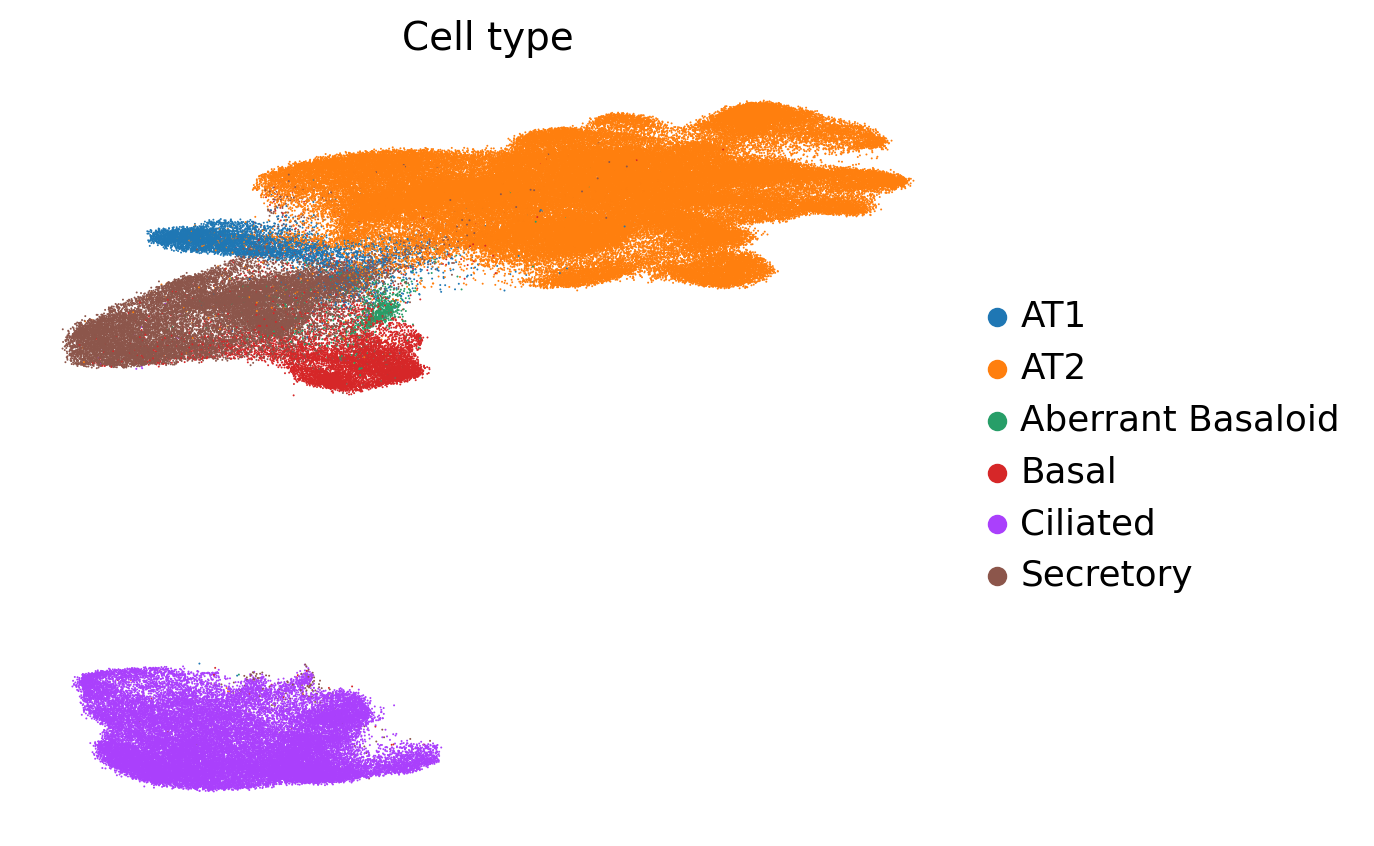

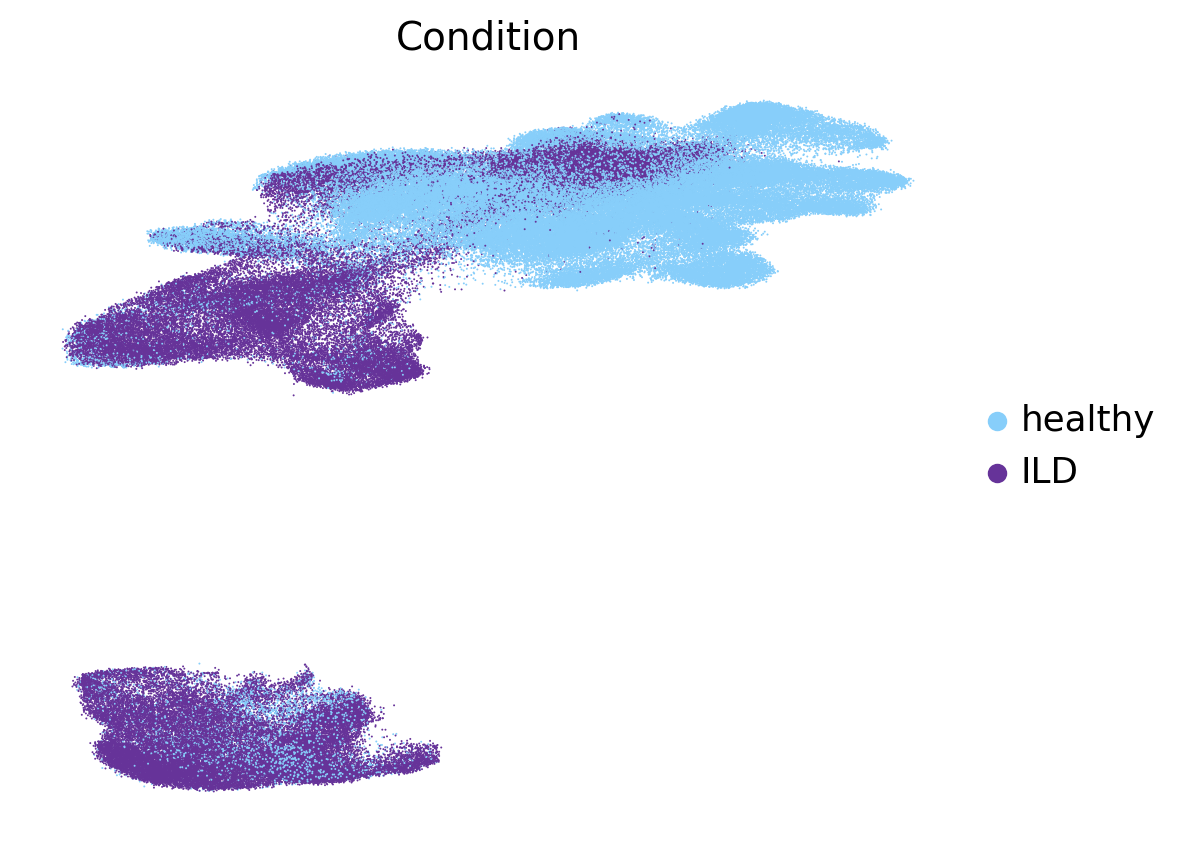

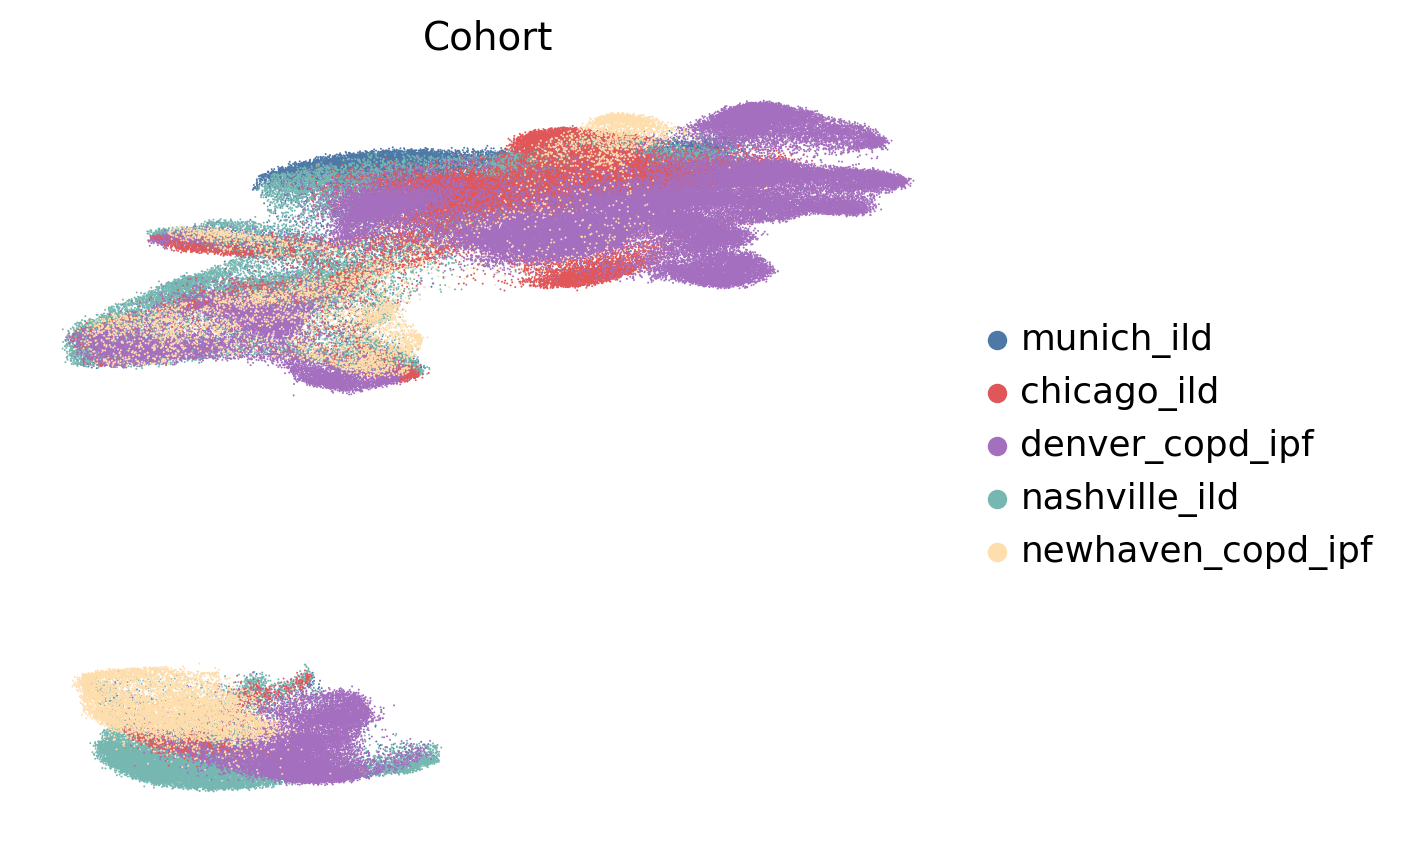

In [15]:
## save UMAPs
sc.pl.umap(adata, color = ['cell_type_niklas'], title = 'Cell type', frameon = False, size = 2, 
           palette = cell_type_colours,
           ax = mysize(6, 5, 100), save = '_celltype.pdf')

sc.pl.umap(adata, color = ['health_state'], title = 'Condition', frameon = False, size = 2,
           ax = mysize(6, 5, 100), save = '_condition.pdf')

sc.pl.umap(adata, color = ['data_set'], title = 'Cohort', frameon = False, size = 2,
           ax = mysize(6, 5, 100), save = '_cohort.pdf')

### Marker gene signature

In [16]:
## function to add pct expressed 
def add_pct(adata, tab, ids, group_by, thresh_min=0, gene_label='gene'):
    for ident in ids:
        
        # subset to cell type of interest
        cells_oi = adata.obs_names[adata.obs[group_by] == ident]
        # compute fraction (%) of cell type expressing each marker genes
        data_temp_oi = pd.DataFrame(((adata[cells_oi].layers['counts'] > 0).sum(0)
                / adata[cells_oi].layers['counts'].shape[0]).T, index=adata.var_names)
        
        # subset to all other cells (background)
        cells_background = adata.obs_names[adata.obs[group_by] != ident]
        # compute fraction (%) to background expressing each marker genes
        data_temp_background = pd.DataFrame(((adata[cells_background].layers['counts'] > 0).sum(0)
                / adata[cells_background].layers['counts'].shape[0]).T, index=adata.var_names)
        
        if gene_label == 'index':
            tab[f'pct_cell_type'] = data_temp_oi.reindex(tab.index.values).values
            tab[f'pct_background'] = data_temp_background.reindex(tab.index.values).values
        else:
            tab[f'pct_cell_type'] = data_temp_oi.reindex(tab.loc[:, gene_label]).values
            tab[f'pct_background'] = data_temp_background.reindex(tab.loc[:, gene_label]).values
    return tab

In [17]:
label = 'cell_type_niklas'

In [18]:
## automated heatmap - based on scanpy's score, but we will use top markers based on score and log2FC
sc.tl.dendrogram(adata, groupby = label)
sc.tl.rank_genes_groups(adata, groupby = label, groups = 'all', use_raw = True, method = 'wilcoxon', n_genes=500)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type_niklas']`
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:09:26)


In [19]:
## create marker table
result = adata.uns['rank_genes_groups']
all_markers = []
for cell_type in result['names'].dtype.names:
    ct_table = pd.DataFrame({'gene': result['names'][cell_type], 'score': result['scores'][cell_type],
                            'logfoldchange': result['logfoldchanges'][cell_type], 'pval': result['pvals'][cell_type],
                            'pval_adj': result['pvals_adj'][cell_type], 'cell_type': cell_type})
    # compute pct expressed for cell type and background
    ct_table = add_pct(adata, ct_table, [cell_type], group_by = label)
    # append to all markers table
    all_markers.append(ct_table)
    
## concat into pandas df  
all_markers = pd.concat(all_markers)

## filter by p value
all_markers = all_markers[all_markers.pval_adj < 0.1].copy()
## only consider genes expressed in at least 25% of cells of cell type of interest
all_markers = all_markers[all_markers.pct_cell_type > 0.25].copy()
## sort marker gene table by log FC and adjusted FC
all_markers = all_markers.sort_values(['cell_type','logfoldchange','pval_adj'], ascending=[True,False,True])
all_markers.head()

gene       score  logfoldchange           pval       pval_adj cell_type  \
15  SPOCK2   56.703789       7.922583   0.000000e+00   0.000000e+00       AT1   
13   RTKN2   57.765038       7.046625   0.000000e+00   0.000000e+00       AT1   
72  COL4A2   33.058590       6.829858  1.170792e-239  2.489386e-237       AT1   
1     AGER  101.294067       5.699836   0.000000e+00   0.000000e+00       AT1   
32  NCKAP5   43.163227       5.664721   0.000000e+00   0.000000e+00       AT1   

    pct_cell_type  pct_background  
15       0.439163        0.004464  
13       0.451176        0.010334  
72       0.257766        0.004219  
1        0.814828        0.102946  
32       0.344259        0.014827

In [20]:
### save marker table
#out_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/01_data/marker_table/'
#all_markers.to_csv(out_dir + '220111_CPC_IPF_reference_endothelia_markers_table_celltype.csv', index = False)

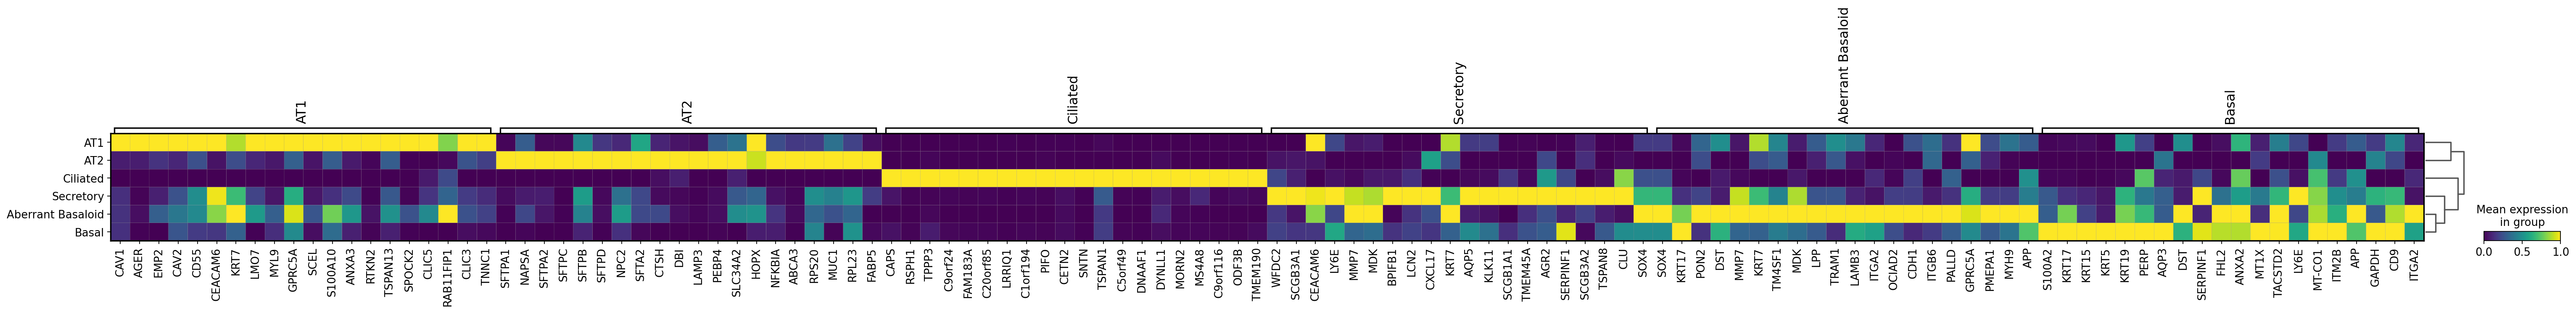

In [21]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes = 20, standard_scale = 'var',  save= 'auto_markers.pdf')

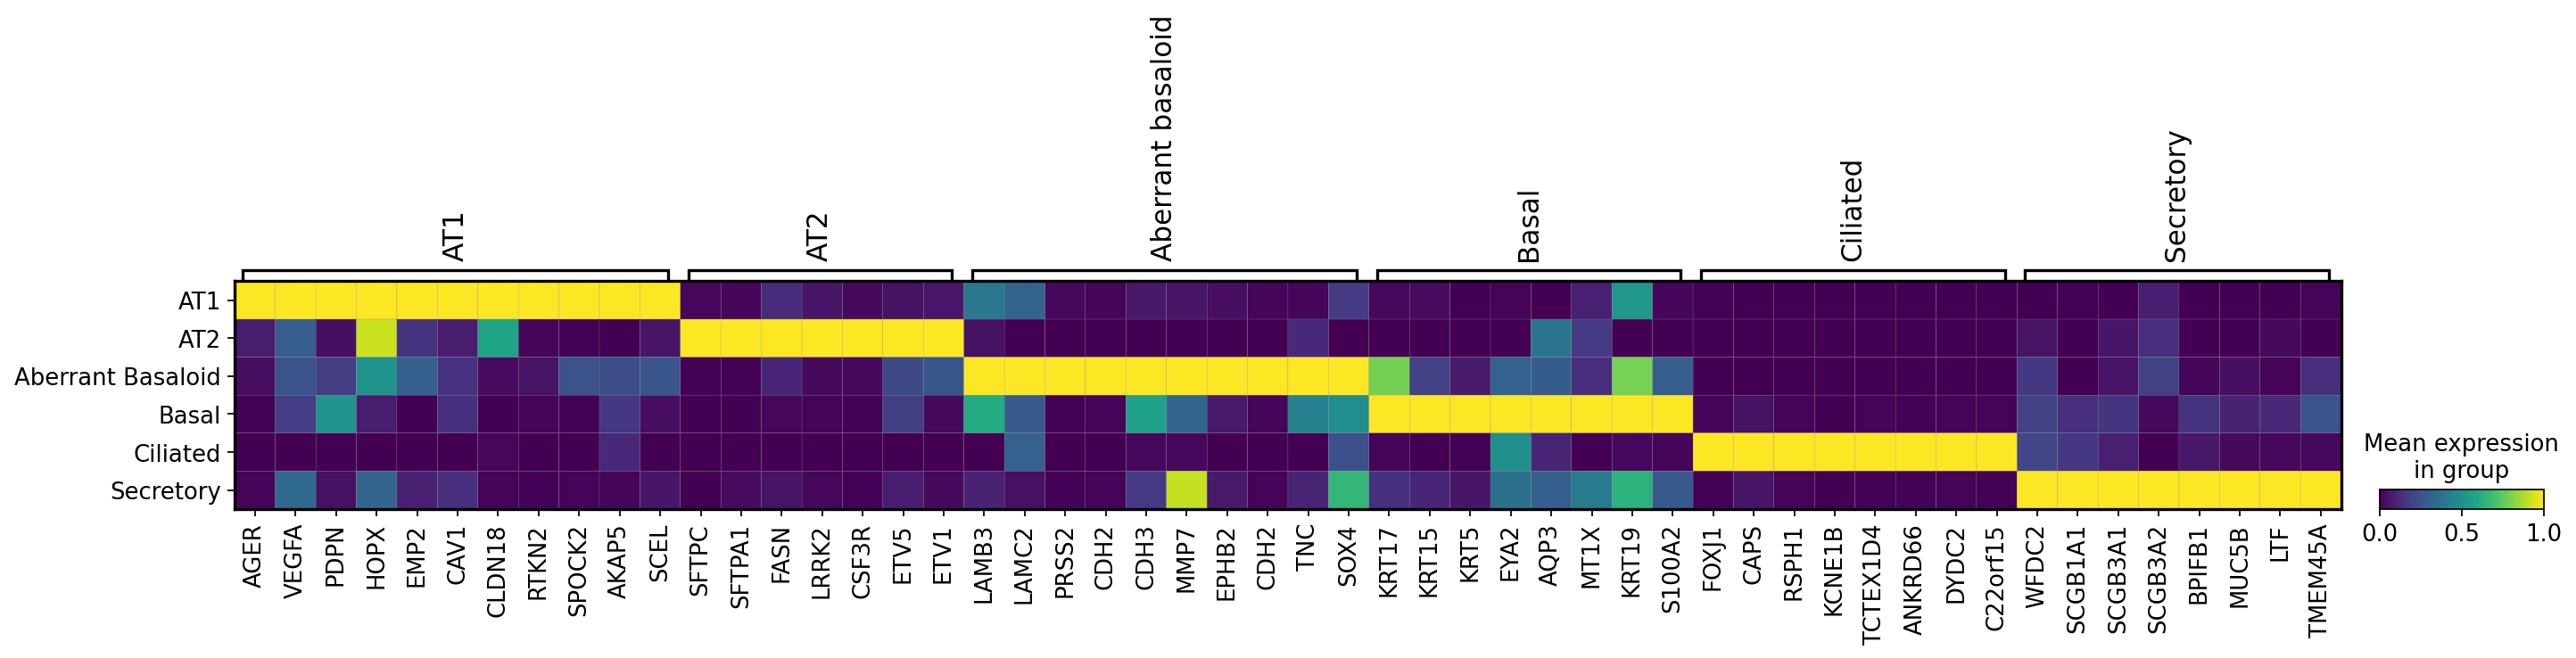

In [29]:
## custom heatmap
# matrixplot with marker genes
celltype_markers={'AT1' : ['AGER','VEGFA','PDPN','HOPX','EMP2','CAV1','CLDN18','RTKN2','SPOCK2','AKAP5','SCEL'],
                  'AT2' : ['SFTPC','SFTPA1','FASN','LRRK2','CSF3R','ETV5','ETV1'],
                  'Aberrant basaloid' : ['LAMB3','LAMC2','PRSS2','CDH2','CDH3','MMP7','EPHB2','CDH2','TNC','SOX4'],
                  'Basal' : ['KRT17','KRT15','KRT5','EYA2','AQP3','MT1X','KRT19','S100A2'],
                  'Ciliated' : ['FOXJ1','CAPS','RSPH1','KCNE1B','TCTEX1D4','ANKRD66','DYDC2','C22orf15'],
                  'Secretory' : ['WFDC2','SCGB1A1','SCGB3A1','SCGB3A2','BPIFB1','MUC5B','LTF','TMEM45A']            
}
sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type_niklas',standard_scale='var', dendrogram=False,
                     save='curated_markers.pdf' )

### Stacked bar plot to visualize changes in frequency

In [23]:
## frequency table no.1
adata.obs['cell_type_niklas'] = adata.obs['cell_type_niklas'].astype('category')
xlabel = 'health_state'
cell_types_label = 'cell_type_niklas'
cols = adata.uns['%s_colors' %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = sct.calc.relative_frequencies(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

AT1       AT2  Aberrant Basaloid     Basal  Ciliated  Secretory  \
001C  0.5  0.027778                0.0  0.263889     0.125   0.083333   
002C  0.0  0.125000                0.0  0.000000     0.875   0.000000   

     health_state  
001C      healthy  
002C      healthy

Saving Figure to /home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/ep
ithelia_subset/relfreqs_treatment.pdf

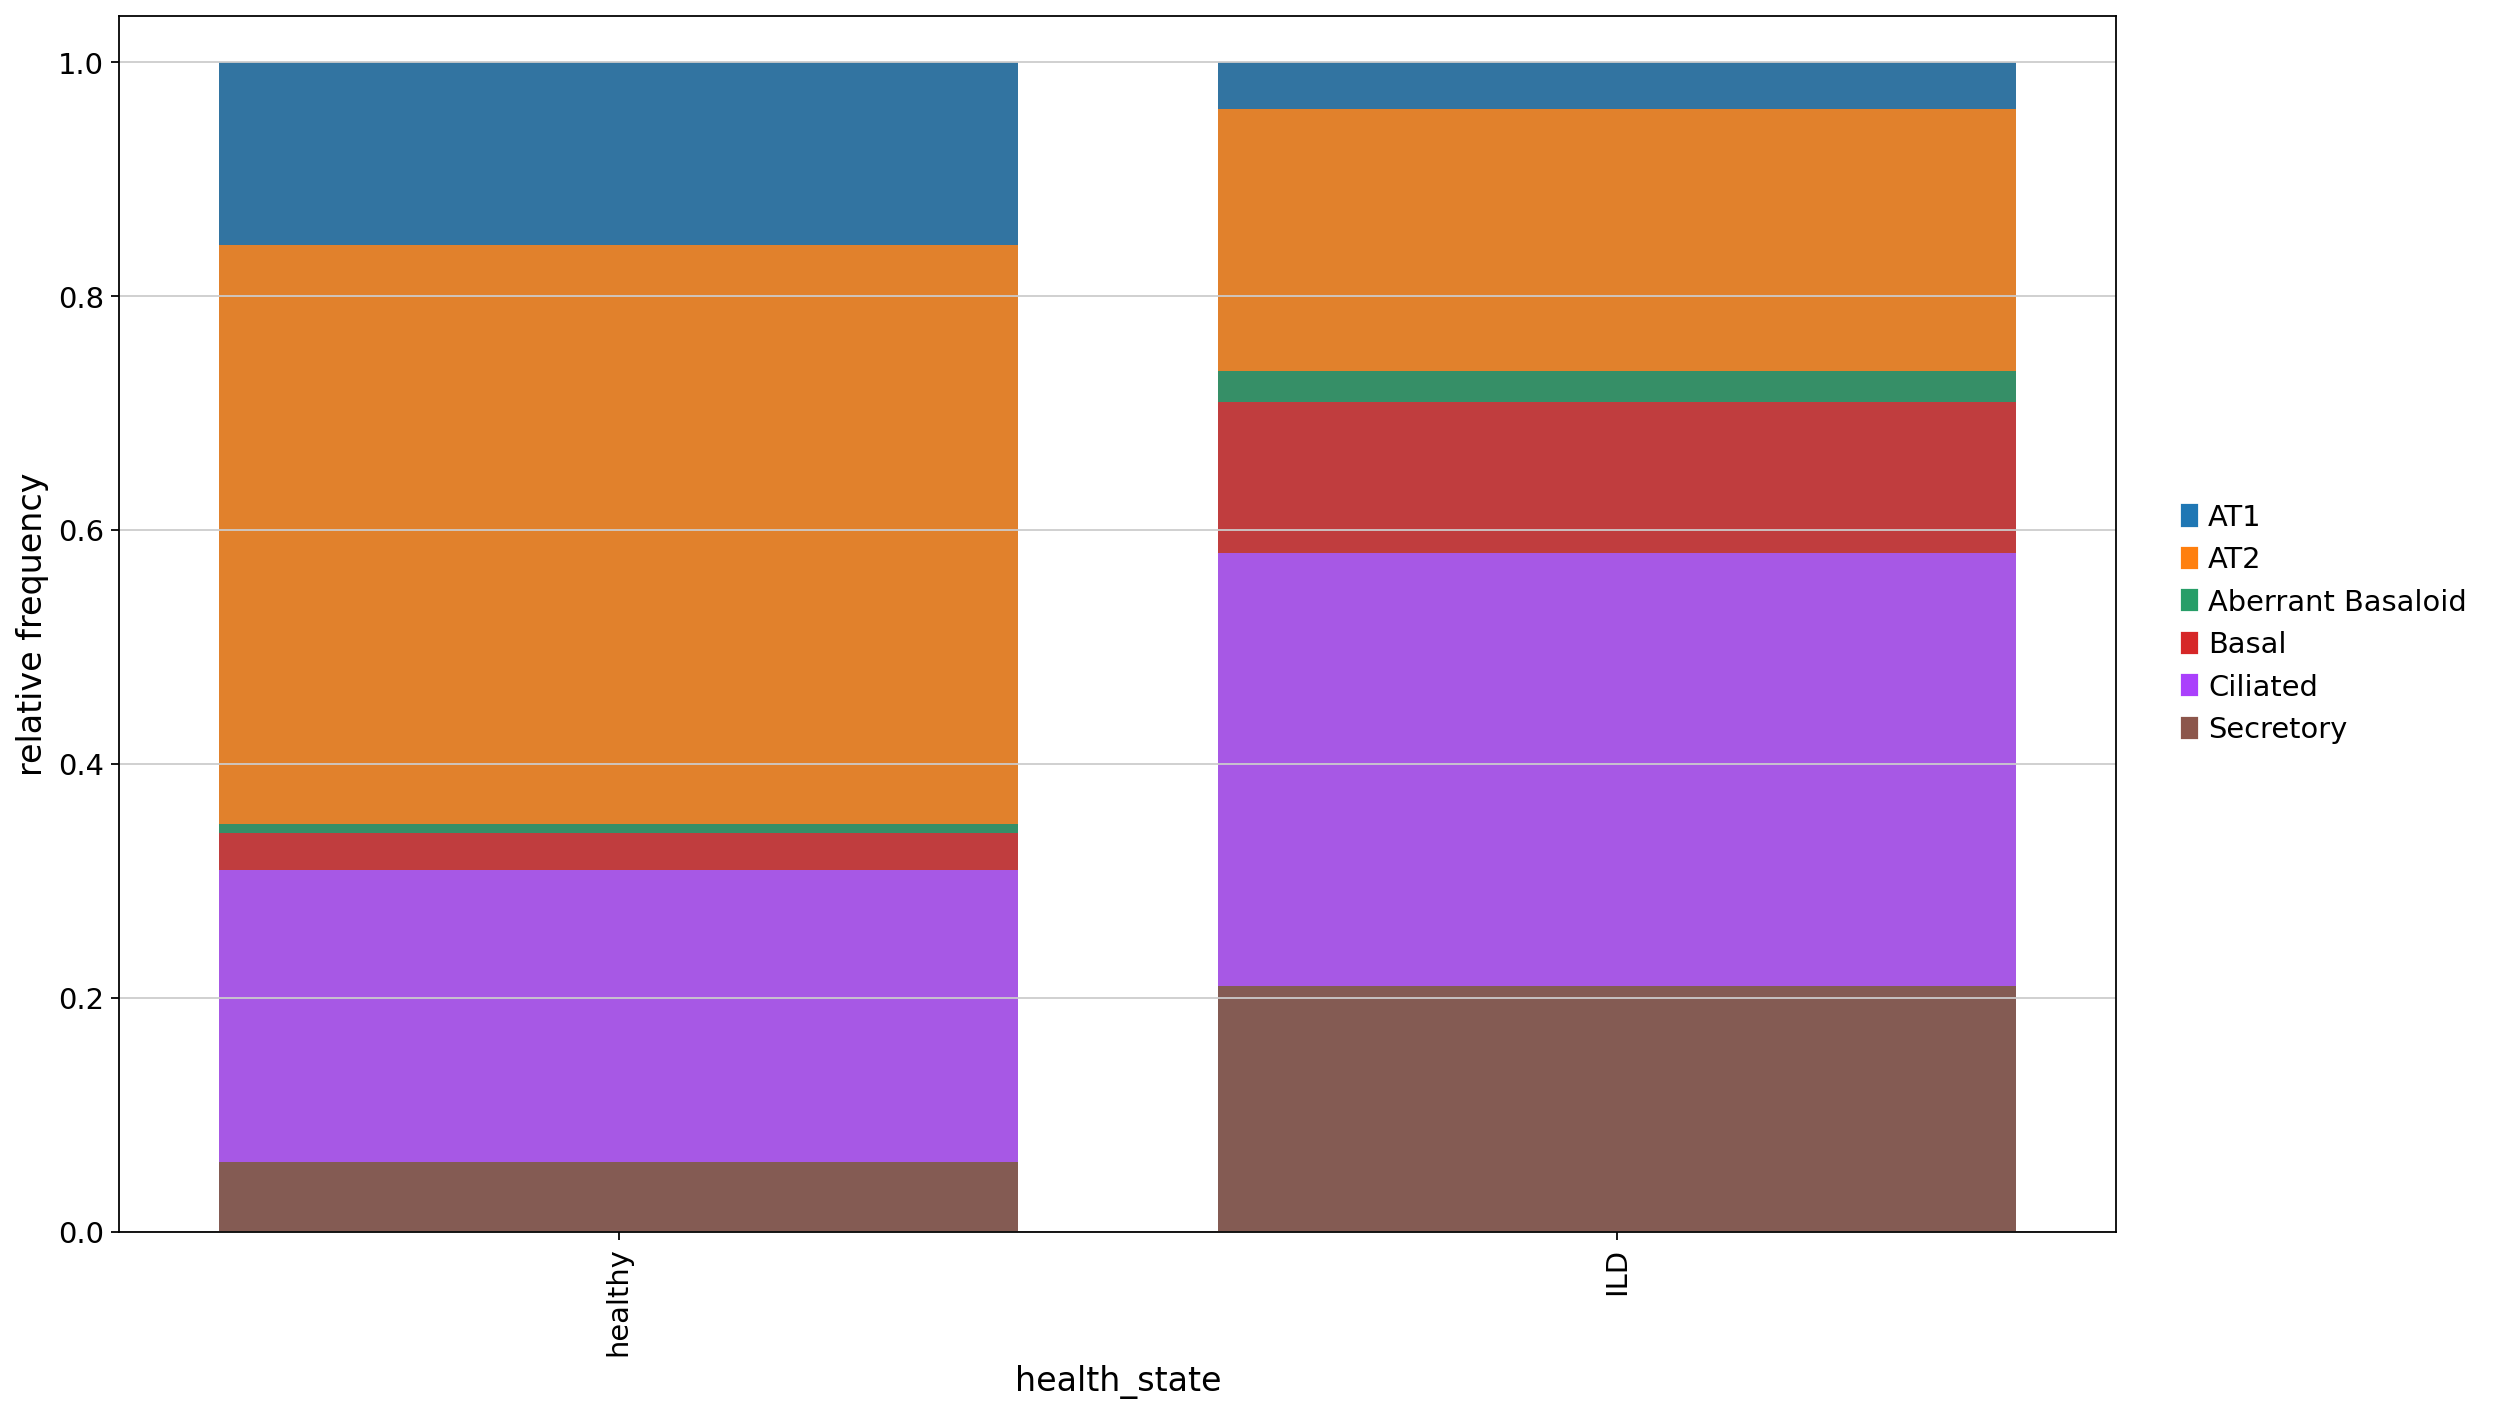

In [24]:
## cell type frequencies per treatment category
sct.plot.cluster_composition_stacked_barplot(relFreqs, xlabel = xlabel, figsize = (16,10), order = ['healthy','ILD'], colors = list(cols), width = 0.8,
                                            save='/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/epithelia_subset/relfreqs_treatment.pdf')